# Prelab 3 Christopher Kang/cskang2

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import Audio
from scipy.fftpack import fft  


### Part 1: Zero-padding and Windowing

[200, 250, 0, 20000]

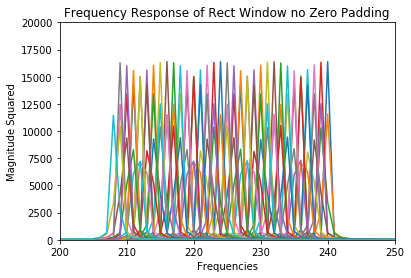

In [218]:
%matplotlib inline      

N = 256;                 # length of test signals
num_freqs = 100;         # number of frequencies to test

# Generate vector of frequencies to test
omega = np.pi/8 + np.linspace(0,num_freqs-1,num_freqs)/num_freqs*np.pi/4;

S = np.zeros([N,num_freqs]);                        # matrix to hold FFT results


# Rectangular Window with no Zero Padding
for i in range(0,len(omega)):                       # loop through freq. vector
    s = np.sin(omega[i]*np.linspace(0,N-1,N));      # generate test sine wave
    win = signal.boxcar(N);                         # use rectangular window
    s = s*win;                                      # multiply input by window
    S[:,i] = np.square(np.abs(np.fft.fft(s)));      # generate magnitude of FFT
                                                    # and store as a column of S

plt.plot(S);                                        # plot all spectra on same graph
plt.title("Frequency Response of Rect Window no Zero Padding")
plt.xlabel("Frequencies")
plt.ylabel("Magnitude Squared")
plt.axis([200, 250, 0, 20000])


[200, 250, 0, 5000]

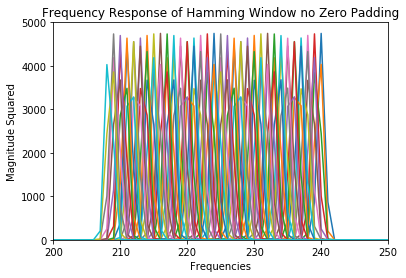

In [220]:
# Hamming Window with no Zero Padding 
S = np.zeros([N,num_freqs]);                        # matrix to hold FFT results
for i in range(0,len(omega)):                       
    s = np.sin(omega[i]*np.linspace(0,N-1,N));      
    win = signal.hamming(N);        
    s = s*win;                                      
    S[:,i] = np.square(np.abs(np.fft.fft(s)));      
                                                    

plt.figure()
plt.plot(S);     
plt.title("Frequency Response of Hamming Window no Zero Padding")
plt.xlabel("Frequencies")
plt.ylabel("Magnitude Squared")
plt.axis([200, 250, 0, 5000])



[820, 975, 0, 17000]

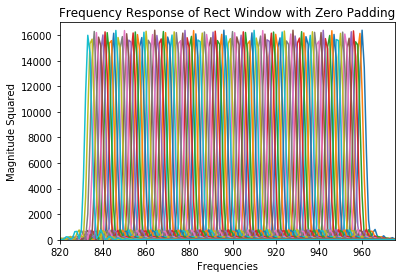

In [221]:
# Rectangular Window with Zero Padding 
S = np.zeros([N*4,num_freqs]);                        # matrix to hold FFT results
for i in range(0,len(omega)):                       
    s = np.sin(omega[i]*np.linspace(0,N-1,N));      
    win = signal.boxcar(N);        
    s = s*win;                                      
    S[:,i] = np.square(np.abs(np.fft.fft(s, 1024)));      
                                                    

plt.figure()
plt.plot(S);
plt.title("Frequency Response of Rect Window with Zero Padding")
plt.xlabel("Frequencies")
plt.ylabel("Magnitude Squared")
plt.axis([820, 975, 0, 17000])


[820, 975, 0, 5000]

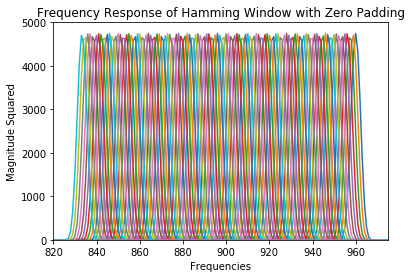

In [222]:
# Hamming Window with Zero Padding 
S = np.zeros([N*4,num_freqs]);                        # matrix to hold FFT results
for i in range(0,len(omega)):                       
    s = np.sin(omega[i]*np.linspace(0,N-1,N));      
    win = signal.hamming(N);        
    s = s*win;                                      
    S[:,i] = np.square(np.abs(np.fft.fft(s,1024)));      
                                                    

plt.figure()
plt.plot(S);
plt.title("Frequency Response of Hamming Window with Zero Padding")
plt.xlabel("Frequencies")
plt.ylabel("Magnitude Squared")
plt.axis([820, 975, 0, 5000])

Describe the tradeoff between mainlobe width and sidelobe behavior for the various window functions. Does zero-padding increase frequency resolution? Are we getting something for free? What is the relationship between the DFT, X[k], and the DTFT, X(ω), of a sequence x[n]?

- For rectangular windows, the mainlobe is typically wider which causes sidelobes to be less noticeable as well. For Hamming windows however, the mainlobe is more narrower and the sidelobes are more prounouced. Due to rectangular windows having a more noticeable mainlobe, the height/magnitude of each of the main lobes will be more prounounced than the side lobes (vice versa for the Hamming). Zero padding simply adds 0 to the end of the signal during the FFT computation and as a result, doesn't necessarily add any more frequencies for that FFT computations. Having a longer output signal will however make all the current points/frequencies more noticeable and thus gives the perspective of a higher resolution. In a sense, nothing necessarily was traded off for doing this and thus the output shouldn't have any new information as well. DFT and X[k] operates the same procedure of the DTFT but instead of an infinite length, we are limited by N or essentially a finite number. In terms of functionality/similarity, both of them essentially convert the time domain into the frequency domain. 

### Part 2: Resolve close Frequencies

In [70]:
fs = 8000        # Sampling Rate is 8000
duration = 1     # 1 sec
t = np.linspace(0,duration,duration*fs)
freq = 600       # Tune Frequency is 600Hz
tune = np.sin(2*np.pi*freq*t)

# To listen to it, you can use:
Audio(tune,rate=fs)

[1900, 2300, 0, 150]

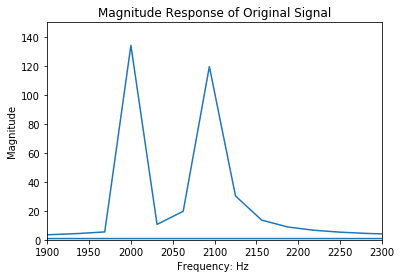

In [203]:
pi = np.pi 
f1 = 2000 
f2 = 2100
n = np.arange(256)
t = n / fs 

x_tn = np.sin(2*pi*f1*t) + np.sin(2*pi*f2*t)
X_N = np.fft.fft(x_tn)

freq_1 = np.fft.fftfreq(256, 1/8000)
plt.plot( freq_1, abs(X_N)  )

plt.xlabel("Frequency: Hz ")
plt.ylabel("Magnitude")
plt.title("Magnitude Response of Original Signal")

plt.axis([1900, 2300, 0, 150])

[1900, 2300, 0, 20000]

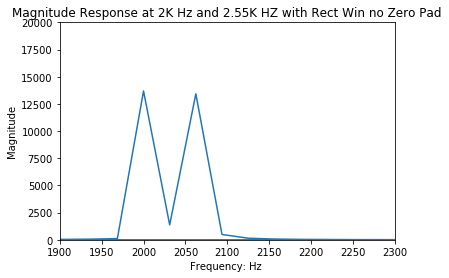

In [224]:
f1 = 2000 
f2 = 2055
n = np.arange(256)
t = n / fs 

x_tn = np.sin(2*pi*f1*t) + np.sin(2*pi*f2*t)
           
# Rectangular Window with no Zero Padding
win = signal.boxcar(256);                         
x1 = x_tn*win ;

X1 = np.square(np.abs(np.fft.fft(x1)));  
freq_1 = np.fft.fftfreq(256, 1/8000)

plt.plot(freq_1, X1);     
plt.xlabel("Frequency: Hz ")
plt.ylabel("Magnitude")
plt.title("Magnitude Response at 2K Hz and 2.55K HZ with Rect Win no Zero Pad")
plt.axis([1900, 2300, 0, 20000])

[1900, 2300, 0, 5500]

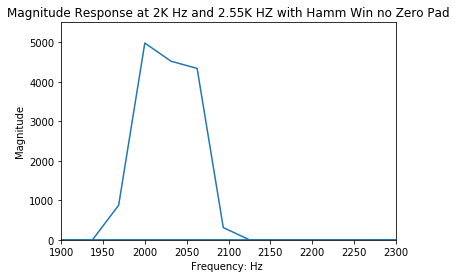

In [225]:
# Hamming Window with no Zero Padding
win = signal.hamming(256);                         
x2 = x_tn*win ;

X2 = np.square(np.abs(np.fft.fft(x2)));  
freq_2 = np.fft.fftfreq(256, 1/8000)

plt.plot(freq_2, X2);     
plt.xlabel("Frequency: Hz ")
plt.ylabel("Magnitude")
plt.title("Magnitude Response at 2K Hz and 2.55K HZ with Hamm Win no Zero Pad")
plt.axis([1900, 2300, 0, 5500])

[1900, 2300, 0, 15000]

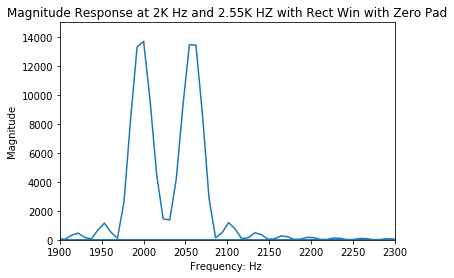

In [226]:
# Rectangular Window with Zero Padding
win = signal.boxcar(256);                         
x3 = x_tn*win ;

X3 = np.square(np.abs(np.fft.fft(x3,1024)));  
freq_3 = np.fft.fftfreq(1024, 1/8000)

plt.plot(freq_3, X3);     
plt.xlabel("Frequency: Hz ")
plt.ylabel("Magnitude")
plt.title("Magnitude Response at 2K Hz and 2.55K HZ with Rect Win with Zero Pad")
plt.axis([1900, 2300, 0, 15000])

[1900, 2300, 0, 6000]

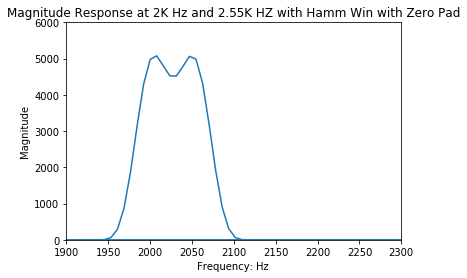

In [227]:
# Hamming Window with Zero Padding
win = signal.hamming(N);                         
x4 = x_tn*win ;

X4 = np.square(np.abs(np.fft.fft(x4,1024)));  
freq_4 = np.fft.fftfreq(1024, 1/8000)

plt.plot(freq_4, X4);     
plt.xlabel("Frequency: Hz ")
plt.ylabel("Magnitude")
plt.title("Magnitude Response at 2K Hz and 2.55K HZ with Hamm Win with Zero Pad")
plt.axis([1900, 2300, 0, 6000])

What is the closest frequency to 2000 Hz that you can resolve using the Fourier transform method? Which of the following method applied to x(n) results in the best resolving capabilities? Why?

- The closest frequency that can be chosen lies within 2050-2060 HZ. The frequency chosen was at 2055 due to no signs of overlaps at each of hte frequency peaks. Between a rectangular window and hamming window, the rectangular window would be the best option here due to emphasizing on the main lobe more or in this case the desired frequencies at 2k and 2050k HZ. Additionally, using the zero padded rectangular window would be good due to providing a sharper peak along with some of the side lobes as well. 

### Part 3: Short-time Spectral Analysis

In [235]:
t = np.linspace(0,0.5,4001)
s = signal.chirp(t,1000,0.5,5000);    # Frequency-sweep that goes from 1000 Hz to 5000 Hz in 0.5 seconds

Audio(s,rate=8192)    # Default rate is 8192Hz



In [207]:
np.shape(s)

(4001,)

Text(0, 0.5, 'Frequency HZ')

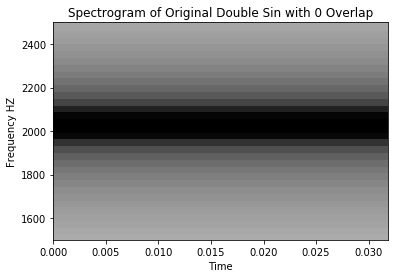

In [230]:
result = plt.specgram(x_tn, Fs = fs, NFFT = 255, noverlap = 0, cmap = 'gist_gray_r')
plt.ylim(1500,2500)
plt.title("Spectrogram of Original Double Sin with 0 Overlap")
plt.xlabel("Time")
plt.ylabel("Frequency HZ")

Text(0, 0.5, 'Frequency HZ')

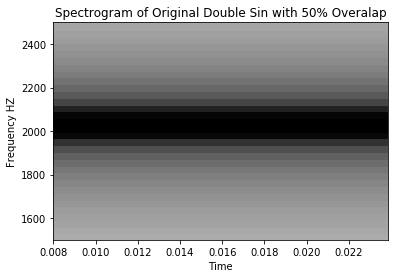

In [231]:
result = plt.specgram(x_tn, Fs = fs, NFFT = 255, noverlap = 128, cmap = 'gist_gray_r')
plt.ylim(1500,2500)
plt.title("Spectrogram of Original Double Sin with 50% Overalap")
plt.xlabel("Time")
plt.ylabel("Frequency HZ")

(3000, 4000)

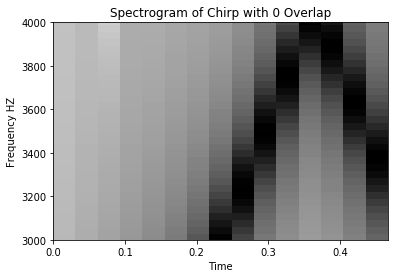

In [237]:
result = plt.specgram(s, Fs = 8192, NFFT = 255, noverlap = 0, cmap = 'gist_gray_r')
plt.title("Spectrogram of Chirp with 0 Overlap")
plt.xlabel("Time")
plt.ylabel("Frequency HZ")
plt.ylim(3000,4000)

(3000, 4000)

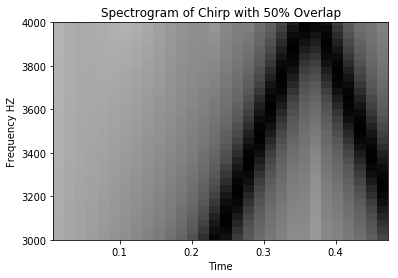

In [238]:
result = plt.specgram(s, Fs = 8192, NFFT = 255, noverlap = 128, cmap = 'gist_gray_r')
plt.title("Spectrogram of Chirp with 50% Overlap")
plt.xlabel("Time")
plt.ylabel("Frequency HZ")
plt.ylim(3000,4000)

How are the spectrograms different between no overlap and 50% overlap? What is going on at 0.4 seconds into the frequency-sweep signal?

- As the name implies, having an overlap percentage will along the signal to overlap with the previous signal. This will end up colliding the 2 signals together and the colors will have more variety due to these overlap. This can be seen at 0.4 of the frequency sweep signal as there are multiple shades of gray/black compared to the non overlapped spectrogram. 